# Как работать с ipynb блокнотами


In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Data:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.xp = []
        self.yp = []

    def add_point(self, px):
        py = self.interpolate(self.x, self.y, px)

        self.x = np.append(self.x, px)
        self.x = np.sort(self.x)
        i = np.where(self.x == px)[0]
        self.y = np.insert(self.y, i, py)

        self.xp.append(px)
        self.yp.append(py)


    def __get_data__(self):
        return self.x, self.y, self.xp, self.yp


    @staticmethod
    def interpolate(arr, arr2, x_new):
        index = np.searchsorted(arr, x_new, side='left')
        x_left, x_right = arr[index - 1], arr[index]
        y_left, y_right = arr2[index - 1], arr2[index]

        k = (y_right - y_left) / (x_right - x_left)
        b = y_left - k * x_left
        y_new = k * x_new + b
        return y_new


class Point:
    def __init__(self, x):
        self.x = x

    def get_init(self):
        return self.x


x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([-2.0, 3.89, 4.033, 5.023, 9.0, 11.0])


In [2]:
data = Data(x, y)
u = np.linspace(0.1, 4.9, 20)
print(u)


for i in u:
    data.add_point(i)

print(data.__get_data__)

[0.1        0.35263158 0.60526316 0.85789474 1.11052632 1.36315789
 1.61578947 1.86842105 2.12105263 2.37368421 2.62631579 2.87894737
 3.13157895 3.38421053 3.63684211 3.88947368 4.14210526 4.39473684
 4.64736842 4.9       ]
<bound method Data.__get_data__ of <__main__.Data object at 0x00000197427CF2B0>>


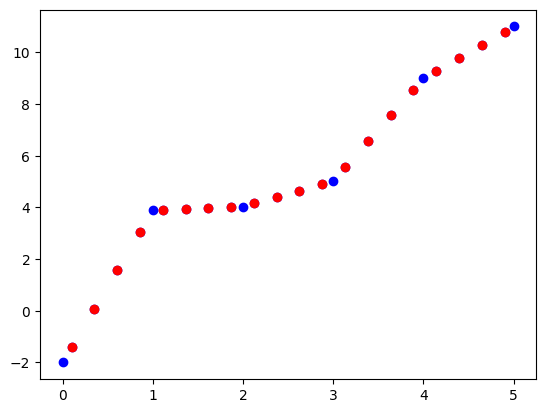

In [3]:
plt.plot(data.__get_data__()[0], data.__get_data__()[1], "bo")
plt.plot(data.__get_data__()[2], data.__get_data__()[3], "ro")
plt.show()
